# Lending Club Case Study

## Import packages

In [211]:
#Import necessary packages
import chardet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

## Load dataset

In [212]:
#check the encoding of input data:
with open('loan.csv','rb') as raw_data:
    result = chardet.detect(raw_data.read(2000))
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [213]:
#load the loan dataset
loan_data = pd.read_csv('loan.csv',dtype='unicode')

In [214]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN


In [215]:
loan_data.shape

(39717, 111)

## Data cleaning

### Removing unnecessary and null columns

In [216]:
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

There are columns with many Null values. We can drop these rows as they won't be of use to us in the analysis. We will drop rows that contain more that 80 percent as null values.

In [217]:
#Getting the percent of null values
null_percent = loan_data.isnull().sum() * 100 / len(loan_data)
null_percent

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [218]:
#Get the columns that does has more than 80% null values. 
null_percent_df = pd.DataFrame({'column_name': loan_data.columns,
                               'null_percent': null_percent.round(2)})
(null_percent_df.null_percent > 80).sum()

56

There seems to be 56 columns with percent of null values exceeding 80 percent. We can drop these columns.

In [219]:
#get the column names to be dropped.
columns_to_drop = null_percent_df[null_percent_df.null_percent > 80].column_name.tolist()
master_frame = loan_data.drop(columns_to_drop, axis = 1)
master_frame.shape

(39717, 55)

In [220]:
#checking the percent of null after removal of null columns
new_null_percent = master_frame.isnull().sum() * 100 / len(master_frame)
new_null_percent[new_null_percent>0]

emp_title                      6.191303
emp_length                     2.706650
desc                          32.580507
title                          0.027696
mths_since_last_delinq        64.662487
revol_util                     0.125891
last_pymnt_d                   0.178765
last_credit_pull_d             0.005036
collections_12_mths_ex_med     0.140998
chargeoff_within_12_mths       0.140998
pub_rec_bankruptcies           1.754916
tax_liens                      0.098195
dtype: float64

In [221]:
master_frame['chargeoff_within_12_mths'].value_counts()

0    39661
Name: chargeoff_within_12_mths, dtype: int64

In [222]:
master_frame['tax_liens'].value_counts()

0    39678
Name: tax_liens, dtype: int64

In [223]:
master_frame['collections_12_mths_ex_med'].value_counts()

0    39661
Name: collections_12_mths_ex_med, dtype: int64

In [224]:
master_frame['policy_code'].value_counts()

1    39717
Name: policy_code, dtype: int64

In [225]:
master_frame['pymnt_plan'].value_counts()

n    39717
Name: pymnt_plan, dtype: int64

In [226]:
master_frame['delinq_amnt'].value_counts()

0    39717
Name: delinq_amnt, dtype: int64

In [227]:
master_frame['acc_now_delinq'].value_counts()

0    39717
Name: acc_now_delinq, dtype: int64

In [228]:
master_frame['application_type'].value_counts()

INDIVIDUAL    39717
Name: application_type, dtype: int64

In [229]:
master_frame['initial_list_status'].value_counts()

f    39717
Name: initial_list_status, dtype: int64

### Unnecessary columns:

##### Customer behavior variables are not available at the time of loan application, and thus they cannot be used as predictors for credit approval.

desc: Loan description provided by the borrower. This is a text field contains descirptive data. Processing this is beyond the scope of this assingment. The issued month can be got from the 'issue_d' field.

url: the URL does not help with the analysis 

chargeoff_within_12_mths: 'chargeoff_within_12_mths' only has '0' and null and does not contribute to the analysis.

tax_liens: 'tax_liens' only has '0' and null and does not contribute to the analysis.

collections_12_mths_ex_med: 'collections_12_mths_ex_meds' only has '0' and null and does not contribute to the analysis.

policy_code: Has only value '1'

pymnt_plan: has only value 'n'

delinq_amnt: has only value '0'

acc_now_delinq: has only value '0'

application_type: has only type 'INDIVIDUAL'

initial_list_status: has only value 'f'

title: Has inconsistet text data. It requires to NLP to make it meaningful categories.

emp_title: Has inconsistet text data. It requires to NLP to make it meaningful categories.



Other customer behavior variables

- id 
- member_id 
- delinq_2yrs
- next_pymnt_d
- revol_bal
- revol_util
- last_pymnt_d
- last_pymnt_amnt
- last_credit_pull_d
- total_pymnt         
- total_pymnt_inv     
- total_rec_prncp     
- total_rec_int       
- total_rec_late_fee  
- recoveries             
- collection_recovery_fee

In [230]:
#dropping the columsn mentioned above
drop_list = ['desc','tax_liens','chargeoff_within_12_mths','collections_12_mths_ex_med','url',
            'policy_code','pymnt_plan','delinq_amnt','acc_now_delinq','application_type',
            'initial_list_status','title','emp_title','id','member_id','delinq_2yrs',
            'revol_bal','revol_util','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d',
            'total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee',
            'recoveries','collection_recovery_fee']
master_frame = master_frame.drop(drop_list, axis = 1)

In [231]:
master_frame.shape

(39717, 27)

In [232]:
#checking the percent of null after removal of the above columns
new_null_percent = master_frame.isnull().sum() * 100 / len(master_frame)
new_null_percent[new_null_percent>0]

emp_length                 2.706650
mths_since_last_delinq    64.662487
pub_rec_bankruptcies       1.754916
dtype: float64

In [233]:
#number of rows having atleast one NaN value
print (master_frame.isna().any(axis=1).sum())

26718


In [234]:
#Percent of NaN values by row
null_count_row = master_frame.isnull().sum(axis = 1)*100/len(master_frame.columns)
#null_count_row.sort(reverse = True)
#null_count_row.value_counts()
null_count_row[null_count_row > 0].sort_values(ascending=False)

19828    7.407407
15358    7.407407
24016    7.407407
15389    7.407407
4229     7.407407
           ...   
26539    3.703704
26541    3.703704
26542    3.703704
26545    3.703704
0        3.703704
Length: 26718, dtype: float64

The percent of null values in each row is less than 10 percent. So we will leave it as is and try to impute the remaining null values for the columns.

### Unnecessary rows

In [235]:
master_frame.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

We don't need rows with loan_status = 'Current' as the borrowers are still paying the loan.

In [236]:
master_frame = master_frame[master_frame.loan_status != 'Current']

In [237]:
#checking the percent of null after removal of the above columns
new_null_percent = master_frame.isnull().sum() * 100 / len(master_frame)
new_null_percent[new_null_percent>0]

emp_length                 2.677761
mths_since_last_delinq    64.559193
pub_rec_bankruptcies       1.806776
dtype: float64

mths_since_last_delinq still has a considerable amount of null values. Imputing the columns will not give any meaning full information. So we can drop it.

In [238]:
master_frame = master_frame.drop(['mths_since_last_delinq'], axis = 1)

In [239]:
#Finding number of unique values in each column. We can remove columns that have 1 value as it
#doesn't affect our analysis
col_count = []
for col in master_frame.columns.tolist():
    col_count.append({'column': col, 'unique_count': len(master_frame[col].unique())})
unique = pd.DataFrame(col_count).sort_values('unique_count')
unique.head(19)

,column,unique_count
23,out_prncp,1
24,out_prncp_inv,1
3,term,2
13,loan_status,2
11,verification_status,3
25,pub_rec_bankruptcies,4
21,pub_rec,5
9,home_ownership,5
6,grade,7
19,inq_last_6mths,9


In [240]:
master_frame.out_prncp.value_counts()

0    38577
Name: out_prncp, dtype: int64

In [241]:
master_frame.out_prncp_inv.value_counts()

0    38577
Name: out_prncp_inv, dtype: int64

In [242]:
#delete the above two columns as they contain only 1 value ('0') after deleting "Current" loan_status
master_frame = master_frame.drop(['out_prncp','out_prncp_inv'], axis = 1)

### Imputing/cleaning the columns for format,type  and missing values 

In [243]:
#checking the percent of null after removal of the above columns and rows
new_null_percent = master_frame.isnull().sum() * 100 / len(master_frame)
new_null_percent[new_null_percent>0]

emp_length              2.677761
pub_rec_bankruptcies    1.806776
dtype: float64

In [244]:
master_frame.emp_length.value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [245]:
master_frame.emp_length.isna().sum()

1033

In [246]:
# remove the 'years' from the employement length and make it numeric
#del master_frame['emp_len_yrs']
master_frame['emp_len_yrs'] = master_frame.emp_length.str.rstrip('years ')
master_frame['emp_len_yrs'][master_frame['emp_len_yrs'] == '10+'] = '10' 
master_frame['emp_len_yrs'][master_frame['emp_len_yrs'] == '< 1'] = '1' 
#We will make Na entires as it's own category => 0
master_frame['emp_len_yrs'][master_frame['emp_len_yrs'].isna()] = '0' 
master_frame.emp_len_yrs = master_frame.emp_len_yrs.apply(int)
del master_frame['emp_length']

In [247]:
master_frame.emp_len_yrs.value_counts()

10    8488
1     7677
2     4291
3     4012
4     3342
5     3194
6     2168
7     1711
8     1435
9     1226
0     1033
Name: emp_len_yrs, dtype: int64

In [248]:
#Make the following columns numeric
int_col = ['total_acc']
float_col = ['loan_amnt','funded_amnt','funded_amnt_inv','installment',
             'annual_inc']
master_frame[float_col] = master_frame[float_col].apply(lambda x: x.astype(float))
master_frame[int_col] = master_frame[int_col].apply(lambda x: x.astype('int64'))

In [249]:
#split issue_d field to month and year.
master_frame['issue_d_mnth'] = master_frame.issue_d.apply(lambda x: x.split('-')[0])
print('number of unique months: ',len(master_frame.issue_d_mnth.value_counts()))
master_frame['issue_d_year'] = master_frame.issue_d.apply(lambda x: '20' + x.split('-')[1])
print('number of unique years: ',len(master_frame.issue_d_year.value_counts()))
del master_frame['issue_d']

number of unique months:  12
number of unique years:  5


In [250]:
master_frame.issue_d_year.value_counts()

2011    20516
2010    11532
2009     4716
2008     1562
2007      251
Name: issue_d_year, dtype: int64

In [251]:
print('max in DTI: ',master_frame.dti.max())
print('min in DTI: ',master_frame.dti.min())

max in DTI:  9.99
min in DTI:  0


In [252]:
#DTI: convert to numeric and perform binning
'''
0   - 5      => 5   
>5  - 10     => 10
>10 - 15     => 15
>15 - 20     => 20
>20 - 25     => 25
>25 - 30     => 30

We'll stop at 30 because 29.99 is the max value.

NOTE: lower DTI is better.
'''
master_frame.dti = master_frame.dti.apply(float)
master_frame['dti_range'] =master_frame['dti']
#Ignoring the SettingWithCopyWarning.
with pd.option_context('mode.chained_assignment', None):
    master_frame['dti_range'][(master_frame['dti_range'] <= 5)] = 5
    master_frame['dti_range'][(master_frame['dti_range'] > 5) & (master_frame['dti_range'] <= 10)] = 10
    master_frame['dti_range'][(master_frame['dti_range'] > 10) & (master_frame['dti_range'] <= 15)] = 15
    master_frame['dti_range'][(master_frame['dti_range'] > 15) & (master_frame['dti_range'] <= 20)] = 20
    master_frame['dti_range'][(master_frame['dti_range'] > 20) & (master_frame['dti_range'] <= 25)] = 25
    master_frame['dti_range'][(master_frame['dti_range'] > 25) & (master_frame['dti_range'] <= 30)] = 30
del master_frame['dti']
master_frame.dti_range = master_frame.dti_range.apply(int)

In [253]:
#split earliest_cr_line field to month and year.
master_frame['earliest_cr_line_mnth'] = master_frame.earliest_cr_line.apply(lambda x: x.split('-')[0])
print('number of unique months: ',len(master_frame.earliest_cr_line_mnth.value_counts()))
master_frame['earliest_cr_line_year'] = master_frame.earliest_cr_line.apply(lambda x: x.split('-')[1])
print('number of unique years: ',len(master_frame.earliest_cr_line_year.value_counts()))
del master_frame['earliest_cr_line']

number of unique months:  12
number of unique years:  53


In [254]:
master_frame['int_rate_percent'] = master_frame['int_rate'].str.rstrip('%')
master_frame.int_rate_percent = master_frame.int_rate_percent.apply(float)
del master_frame['int_rate']

In [255]:
master_frame.dtypes

loan_amnt                float64
funded_amnt              float64
funded_amnt_inv          float64
term                      object
installment              float64
grade                     object
sub_grade                 object
home_ownership            object
annual_inc               float64
verification_status       object
loan_status               object
purpose                   object
zip_code                  object
addr_state                object
inq_last_6mths            object
open_acc                  object
pub_rec                   object
total_acc                  int64
pub_rec_bankruptcies      object
emp_len_yrs                int64
issue_d_mnth              object
issue_d_year              object
dti_range                  int64
earliest_cr_line_mnth     object
earliest_cr_line_year     object
int_rate_percent         float64
dtype: object

In [256]:
#checking the percent of null after removal of the above columns and rows
new_null_percent = master_frame.isnull().sum() * 100 / len(master_frame)
new_null_percent[new_null_percent>0]

pub_rec_bankruptcies    1.806776
dtype: float64

In [257]:
#checking the most frequently occuring value
master_frame.pub_rec_bankruptcies.describe()

count     37880
unique        3
top           0
freq      36238
Name: pub_rec_bankruptcies, dtype: object

In [258]:
#most of the pub_rec are 0 so we can fill the missing values with this.
master_frame['pub_rec_bankruptcies'] = master_frame['pub_rec_bankruptcies'].fillna(0)

In [259]:
#checking the percent of null after removal of the above columns and rows
new_null_percent = master_frame.isnull().sum() * 100 / len(master_frame)
new_null_percent[new_null_percent>0]

Series([], dtype: float64)

In [260]:
master_frame.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'installment',
       'grade', 'sub_grade', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'inq_last_6mths', 'open_acc', 'pub_rec', 'total_acc',
       'pub_rec_bankruptcies', 'emp_len_yrs', 'issue_d_mnth', 'issue_d_year',
       'dti_range', 'earliest_cr_line_mnth', 'earliest_cr_line_year',
       'int_rate_percent'],
      dtype='object')

## Univariate Analysis

#### ==> Target variable is loan_status since we are trying to identify defaulters.

In [261]:
master_frame.dtypes

loan_amnt                float64
funded_amnt              float64
funded_amnt_inv          float64
term                      object
installment              float64
grade                     object
sub_grade                 object
home_ownership            object
annual_inc               float64
verification_status       object
loan_status               object
purpose                   object
zip_code                  object
addr_state                object
inq_last_6mths            object
open_acc                  object
pub_rec                   object
total_acc                  int64
pub_rec_bankruptcies      object
emp_len_yrs                int64
issue_d_mnth              object
issue_d_year              object
dti_range                  int64
earliest_cr_line_mnth     object
earliest_cr_line_year     object
int_rate_percent         float64
dtype: object

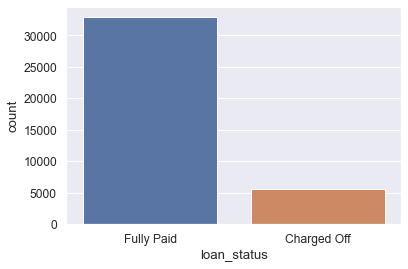

In [262]:
sns.countplot(x= master_frame["loan_status"])
plt.show()

#### ==> Number is defaulters is less compared to non-defaulters

In [263]:
master_frame.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [264]:
#percent of charged off loans
round(5627/(32950+5627)*100,2)

14.59

##### ==>About 14.5% of the loans have defaulters

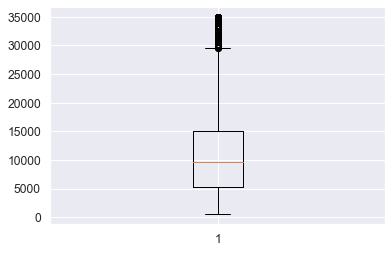

In [265]:
plt.boxplot(master_frame.loan_amnt)
plt.show()

<AxesSubplot:xlabel='loan_amnt', ylabel='Density'>

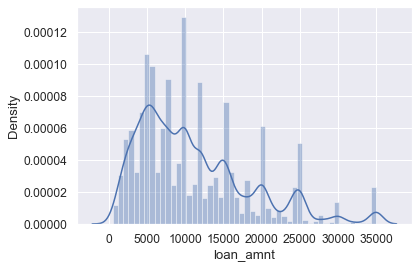

In [266]:
warnings.filterwarnings("ignore")
sns.distplot(master_frame.loan_amnt)

All loan amounts lie between 0 and 35000 and the median is 10000.

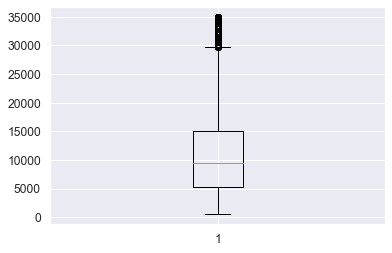

In [267]:
plt.boxplot(master_frame.funded_amnt)
plt.show()

<AxesSubplot:xlabel='funded_amnt', ylabel='Density'>

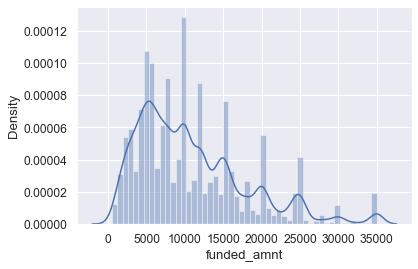

In [268]:
warnings.filterwarnings("ignore")
sns.distplot(master_frame.funded_amnt)

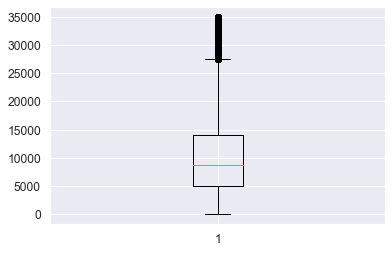

In [269]:
plt.boxplot(master_frame.funded_amnt_inv)
plt.show()

<AxesSubplot:xlabel='funded_amnt', ylabel='Density'>

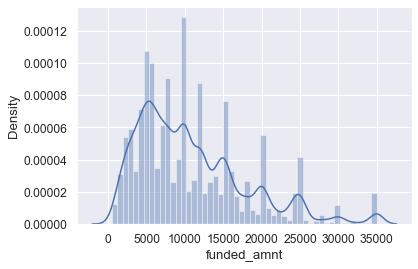

In [270]:
warnings.filterwarnings("ignore")
sns.distplot(master_frame.funded_amnt)

#### ==> loan_amnt, funded_amnt, and funded_amnt_inv seem to have similar distribution.

<AxesSubplot:xlabel='int_rate_percent', ylabel='Density'>

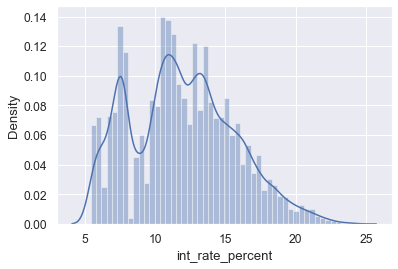

In [271]:
warnings.filterwarnings("ignore")
sns.distplot(master_frame.int_rate_percent)

#### ==> The amount of loans reduces with increase in interest rates. Most of the loans have between 5 and 15 percent interest rate.

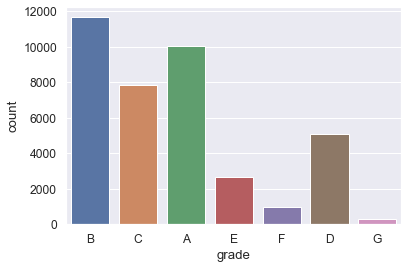

In [272]:
sns.countplot(x='grade',data = master_frame)
plt.show()

#### ==> This shows that most of the loans are for A,B and C grades and lesser number of loans are graded as D,E,F, and G. Meaning most of the loans are lower risk. ( A = least risky  -> G=most risky )

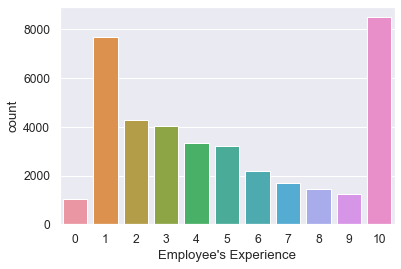

In [273]:
sns.countplot(x='emp_len_yrs', data = master_frame)
plt.xlabel('Employee\'s Experience')
plt.show()

#### ==> Most of the loan applicants have 10 or more years of experience. Next highest are those with 1 year or less experience. '0' was earlier categorised as those with no experience entry in the data. It is evident that this is a minority.

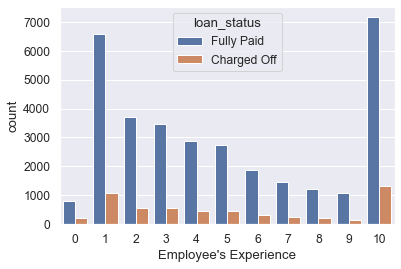

In [274]:
sns.countplot(x='emp_len_yrs', hue='loan_status', data = master_frame)
plt.xlabel('Employee\'s Experience')
plt.show()

#### ==> The defaulters seem to be evenly distributed (by percentage) across all experince levels. But the number of defaulters is quite high among the employees with greater than 10 years experience.

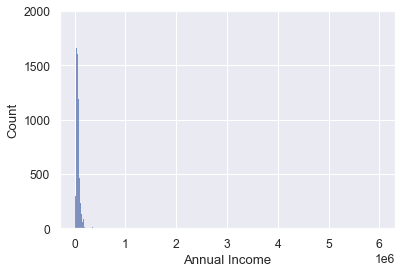

In [275]:
sns.histplot(x=master_frame['annual_inc'])
plt.xlabel('Annual Income')
plt.show()

In [276]:
#min and max annual income
print(master_frame.annual_inc.max())
print(master_frame.annual_inc.min())

6000000.0
4000.0


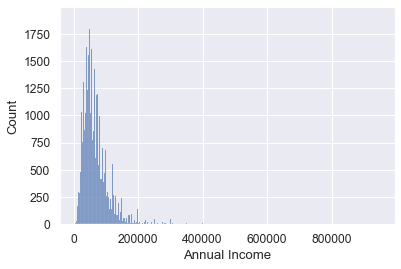

In [277]:
#Checking the distribution be excluding the outliers to get a clearer picture
sns.histplot(x=master_frame[master_frame['annual_inc'] < 1000000]['annual_inc'])
plt.xlabel('Annual Income')
plt.show()

#### ==> Most of the applicants have annual income less than 200000

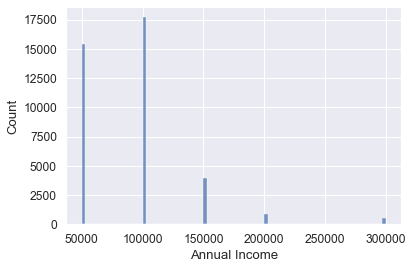

In [278]:
#Binning the annual income
emp_income = master_frame.copy(deep=True)
emp_income.annual_inc = emp_income.annual_inc.apply(lambda x: 50000 if (x <= 50000) else x)
emp_income.annual_inc = emp_income.annual_inc.apply(lambda x: 100000 if (x > 50000 and x <= 100000) else x)
emp_income.annual_inc = emp_income.annual_inc.apply(lambda x: 150000 if (x > 100000 and x <= 150000) else x)
emp_income.annual_inc = emp_income.annual_inc.apply(lambda x: 200000 if (x > 150000 and x <= 200000) else x)
emp_income.annual_inc = emp_income.annual_inc.apply(lambda x: 300000 if (x > 200000) else x)
sns.histplot(x=emp_income.annual_inc)
plt.xlabel('Annual Income')
plt.show()

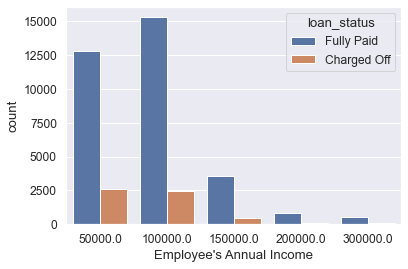

In [279]:
sns.countplot(x='annual_inc', hue='loan_status', data = emp_income)
plt.xlabel('Employee\'s Annual Income')
plt.show()

#### ==> The number of defaulters are higher under 100000 annual income. This could be attributed to the fact that there are more loans that fall into that category. 

<AxesSubplot:>

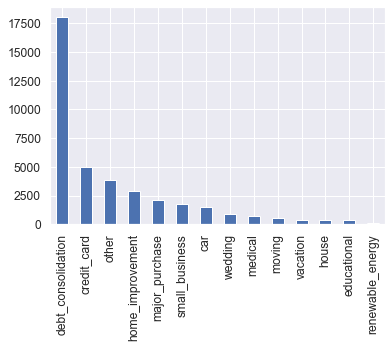

In [280]:
#frequency plot
master_frame.purpose.value_counts().plot.bar()

#### ==> Debt consolildation sems to be the most common purpose for taking the loan

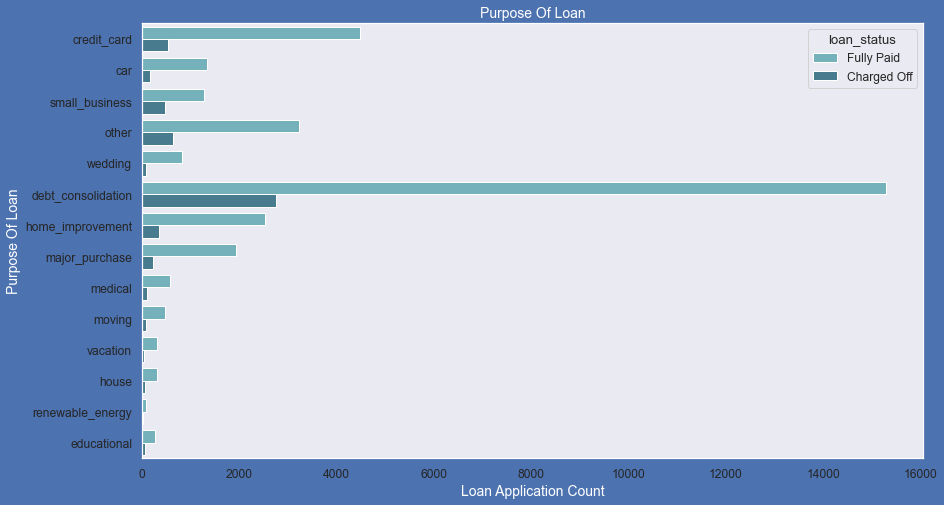

In [281]:
plt.figure(figsize=(14,8),facecolor='b')
sns.set_style("dark")
ax = sns.countplot(y="purpose",data=master_frame,hue='loan_status',palette='GnBu_d')
ax.set_title('Purpose Of Loan',fontsize=14,color='w')
ax.set_ylabel('Purpose Of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

#### ==> debt consolidation seems to have the highest amount of defaulters.

<AxesSubplot:>

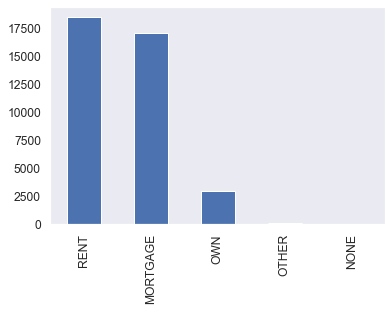

In [282]:
master_frame.home_ownership.value_counts().plot.bar()

#### ==> People paying rent and mortage seem to take loans more that other categories.

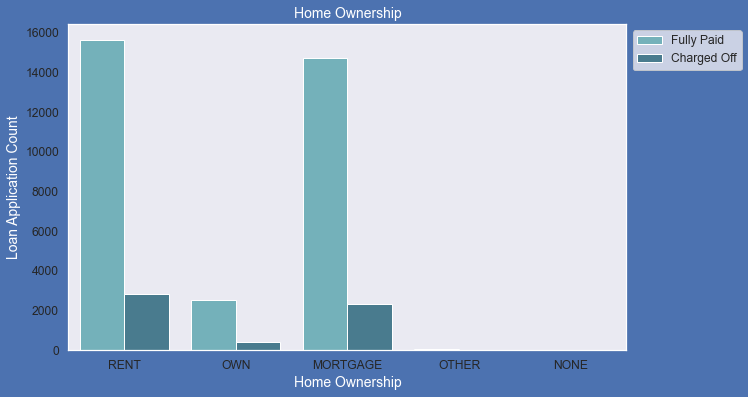

In [283]:
plt.figure(figsize=(10,6),facecolor='b')
ax = sns.countplot(x="home_ownership",data=master_frame,hue='loan_status',palette='GnBu_d')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Home Ownership',fontsize=14,color='w')
ax.set_xlabel('Home Ownership',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

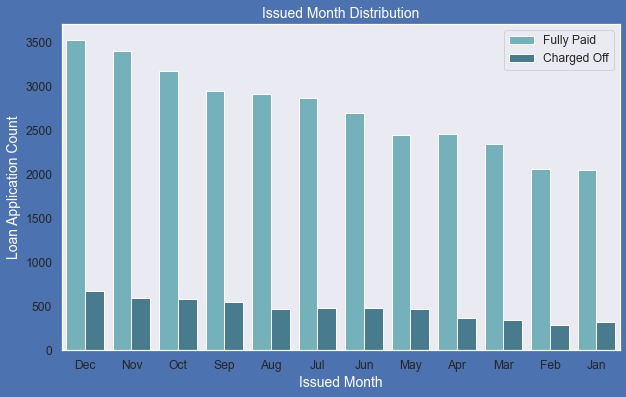

In [284]:
plt.figure(figsize=(10,6),facecolor='b')
ax = sns.countplot(x="issue_d_mnth",data=master_frame,hue='loan_status',palette='GnBu_d')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Issued Month Distribution',fontsize=14,color='w')
ax.set_xlabel('Issued Month',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

#### ==> The number of people applying for lona gradually increases as the year progresses.

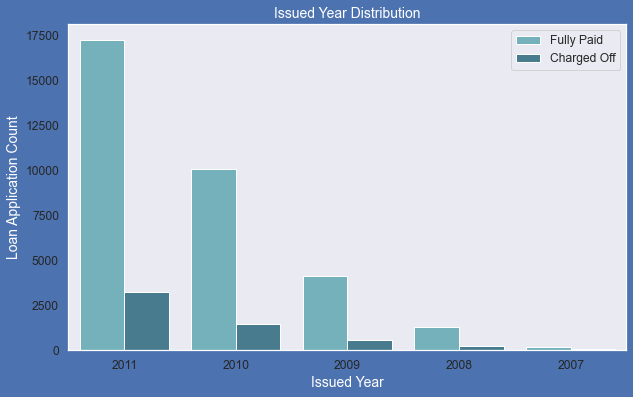

In [285]:
plt.figure(figsize=(10,6),facecolor='b')
ax = sns.countplot(x="issue_d_year",data=master_frame,hue='loan_status',palette='GnBu_d')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Issued Year Distribution',fontsize=14,color='w')
ax.set_xlabel('Issued Year',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

<AxesSubplot:>

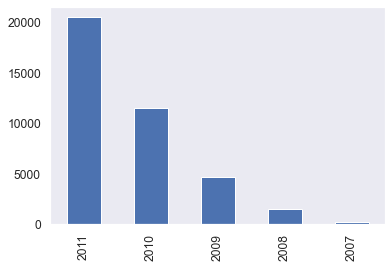

In [286]:
master_frame.issue_d_year.value_counts().plot.bar()

#### ==> The number of loans taken is increasing each year.

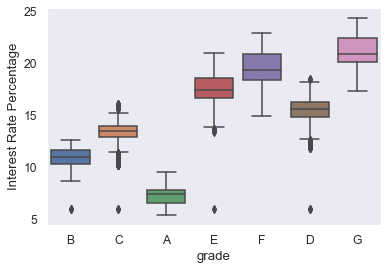

In [287]:
sns.boxplot(y='int_rate_percent', x='grade', data=master_frame)
plt.ylabel('Interest Rate Percentage')
plt.show()

#### ==> The Interest rates for if lower for low risk grade (A) and increases with increase in risk

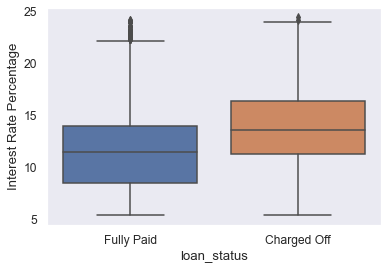

In [288]:
sns.boxplot(y='int_rate_percent', x='loan_status', data=master_frame)
plt.ylabel('Interest Rate Percentage')
plt.show()

#### ==> The median interest rate of defaulters is greater than defaultrs. Therefore loans with higher interest rates could lead to more defaulters

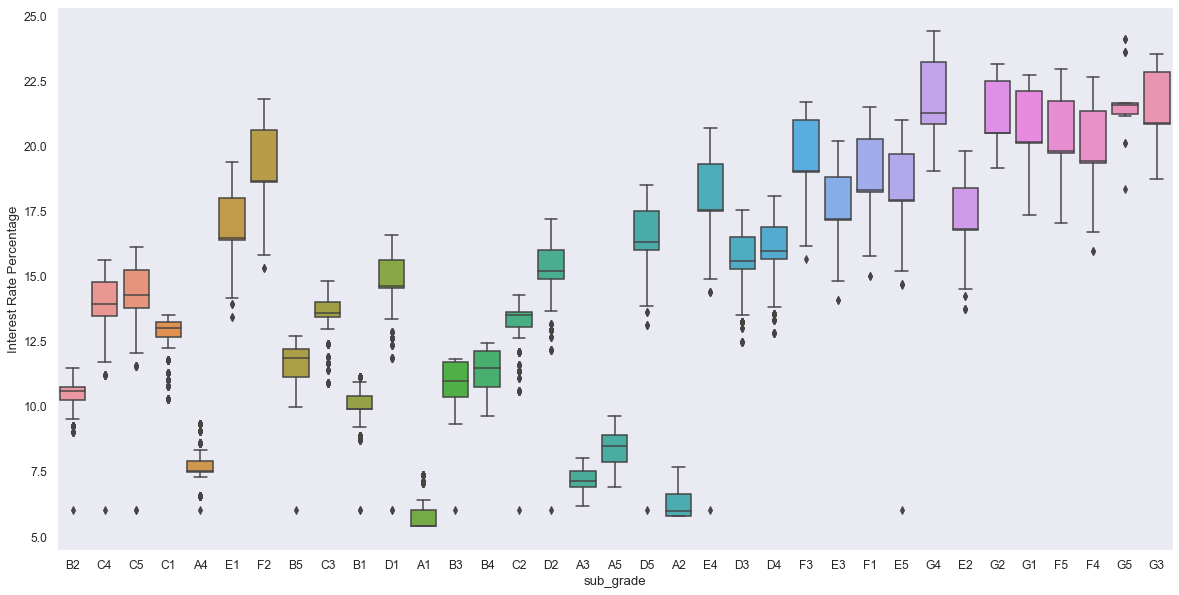

In [289]:
plt.figure(figsize=(20,10))
sns.boxplot(y='int_rate_percent', x='sub_grade', data=master_frame)
plt.ylabel('Interest Rate Percentage')
plt.show()

#### ==> The Interest rates for if lower for low risk grade (A1) and increases with increase in risk

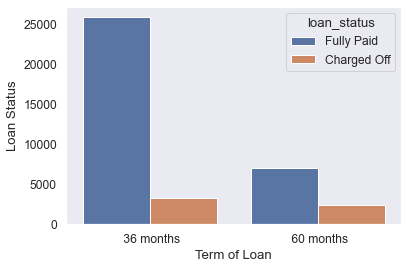

In [290]:
sns.countplot(x='term', hue='loan_status', data=master_frame)
plt.xlabel('Term of Loan')
plt.ylabel('Loan Status')
plt.show()

#### ==> There is a higher percent of defaulters when the loan term in 60 months.

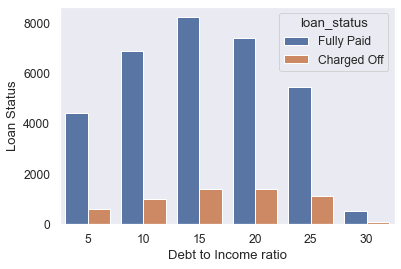

In [291]:
sns.countplot(x='dti_range', hue='loan_status', data=master_frame)
plt.xlabel('Debt to Income ratio')
plt.ylabel('Loan Status')
plt.show()

#### ==> The percent of loan defaulters in each range of Debt to Income ration remain about the same.

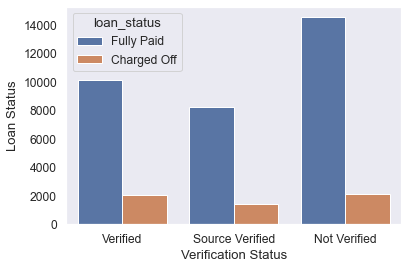

In [292]:
sns.countplot(x='verification_status', hue='loan_status', data=master_frame)
plt.xlabel('Verification Status')
plt.ylabel('Loan Status')
plt.show()

#### ==> The number of defaulters remains fairly the same for verified, source verified and unverified applicants

## Bivariate Analysis

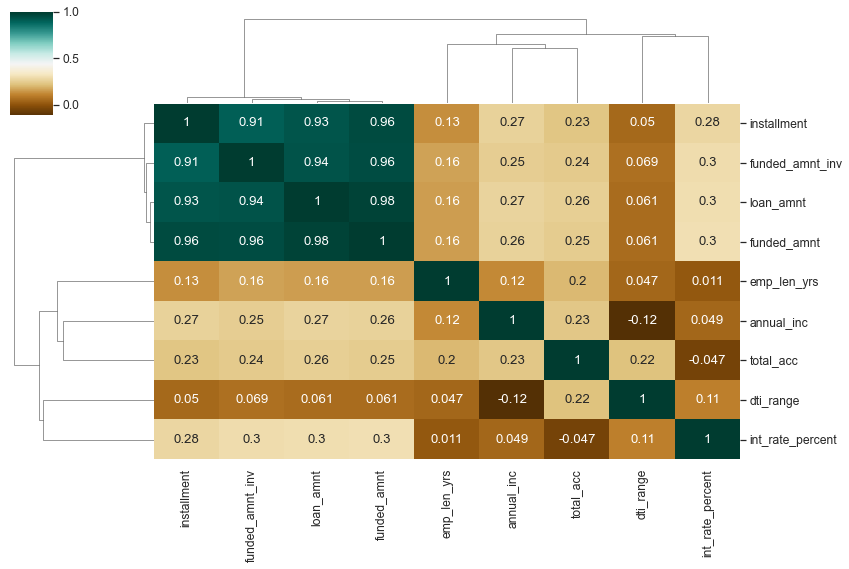

In [293]:
master_correlation = master_frame.corr()
sns.set(font_scale=1.1)
sns.clustermap(master_correlation,annot=True,figsize=(12, 8),cmap="BrBG")
plt.show()

#### ==> This also shows that loan_amount, funded_amnt, funded_amnt_inv are correlated. So, is installment. This is understandable because the monthly installement for a loan will depend on the loan amount.

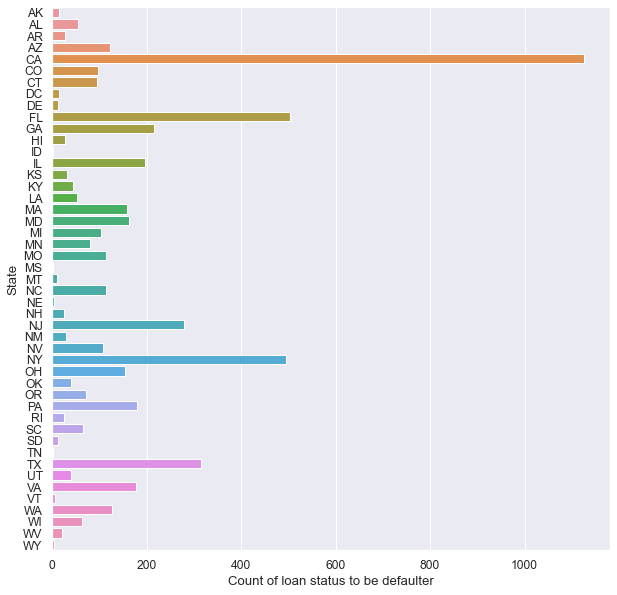

In [294]:
g = master_frame[master_frame['loan_status']=='Charged Off'].groupby('addr_state')['loan_status'].count().reset_index()
plt.figure(figsize=(10,10))
sns.barplot(y='addr_state', x='loan_status', data=g)
plt.xlabel('Count of loan status to be defaulter')
plt.ylabel('State')
plt.show()

#### ==> Most the defaulters are from California (CA) followed by people from Florida(FL) and New York(NY)

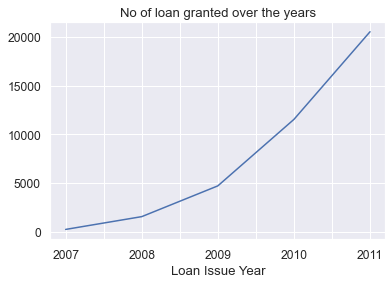

In [295]:
g = master_frame.groupby('issue_d_year')['loan_status'].count()
sns.set(font_scale=1.1)
g.plot.line(x_compat=True)
#plt.xticks(np.arange(min(g.index), max(g.index)+1, 1.0))
plt.title('No of loan granted over the years')
plt.xlabel('Loan Issue Year')
plt.show()

#### To conclude the following variable stands out when trying to identify defaulters:
1. Purpose: debt consolidation had more defaulters compared to others.
2. Address state: Applicants from California particularly were highly likely to default. Florida and New York also showed higher number of defaulters.
3. Interest rate: The applicants were more likely to default with higher interest rates.
4. Term: The percent of defaulters were higher for loans with 60 month term.